In [1]:
import csv

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [3]:
data = pd.read_csv('data/data.csv')
data=data.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_testm, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['sunrise'] = pd.to_datetime(X_train['sunrise'], format='%H%M')
X_train['sunset'] = pd.to_datetime(X_train['sunset'], format='%H%M')
X_testm['date'] = pd.to_datetime(X_testm['date'])
X_testm['sunrise'] = pd.to_datetime(X_testm['sunrise'], format='%H%M')
X_testm['sunset'] = pd.to_datetime(X_testm['sunset'], format='%H%M')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ValueError: unconverted data remains: :27

In [6]:
X_testm.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,UP,HZ,FU,DU,SQ,FZ,MI,PR,BC,BL
131531,2012-11-12,22,104,0.0,10,78,66,72,M,64,...,False,False,False,False,False,False,False,False,False,False
257433,2014-05-25,36,44,52.0,18,87,73,80,3,66,...,False,False,False,False,False,False,False,False,False,False
51109,2013-10-03,4,27,8.0,9,61,56,59,M,55,...,False,False,False,False,False,False,False,False,False,False
67496,2013-05-22,44,105,0.0,12,82,66,74,M,68,...,False,False,False,False,False,False,False,False,False,False
105400,2012-11-14,26,45,44.0,17,60,29,45,M,27,...,False,False,False,False,False,False,False,False,False,False


In [7]:
X_train["week_day_name"] = X_train.date.dt.weekday_name
X_train["day_of_year"] = X_train.date.dt.dayofyear
X_train["year"] = X_train.date.dt.year
# X_testm["week_day_name"] = X_testm.date.dt.weekday_name
# X_testm["day_of_year"] = X_testm.date.dt.dayofyear
# X_testm["year"] = X_testm.date.dt.year


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            df = df.replace(["M",None],np.NaN)
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

#예시

X_train2 = type_change_numeric(X_train,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])

In [10]:
station_6 = X_train2[X_train2['store_nbr'] ==6]
station_7 = X_train2[X_train2['store_nbr'] ==7]
station_8 = X_train2[X_train2['store_nbr'] ==8]
station_9 = X_train2[X_train2['store_nbr'] ==9]
station_10 = X_train2[X_train2['store_nbr'] ==10]

In [12]:
station_6 = station_6.sort_values(by=['date']).reset_index(drop= True)
station_7 = station_7.sort_values(by=['date']).reset_index(drop= True)
station_8 = station_8.sort_values(by=['date']).reset_index(drop= True)
station_9 = station_9.sort_values(by=['date']).reset_index(drop= True)
station_10 = station_10.sort_values(by=['date']).reset_index(drop= True)

In [13]:
station_6.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,DU,SQ,FZ,MI,PR,BC,BL,week_day_name,day_of_year,year
0,2012-01-01,6,9,44.0,14,50.0,34.0,42.0,5.0,25.0,...,False,False,False,False,False,False,False,Sunday,1,2012
1,2012-01-01,6,45,86.0,14,50.0,34.0,42.0,5.0,25.0,...,False,False,False,False,False,False,False,Sunday,1,2012
2,2012-01-01,6,14,0.0,14,50.0,34.0,42.0,5.0,25.0,...,False,False,False,False,False,False,False,Sunday,1,2012
3,2012-01-01,6,107,0.0,14,50.0,34.0,42.0,5.0,25.0,...,False,False,False,False,False,False,False,Sunday,1,2012
4,2012-01-02,6,45,85.0,14,45.0,26.0,36.0,-1.0,16.0,...,False,False,False,False,False,False,False,Monday,2,2012


In [17]:
col_idx = [5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [50]:
def make_xyscatter(df, col_idx):
    
    for idx in  col_idx:
        plt.subplot( 1 , 2, (idx%2+1) )
        plt.scatter(df.units.groupby(df.iloc[:,idx]).mean().values , df.units.groupby(df.iloc[:,idx]).mean() .index)
        plt.xlabel(df.columns[idx])
        plt.ylabel('units')
        plt.show()

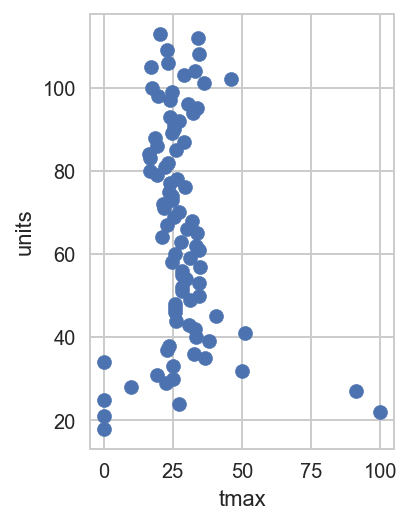

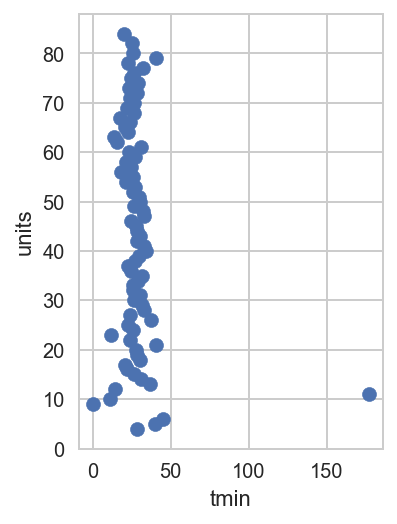

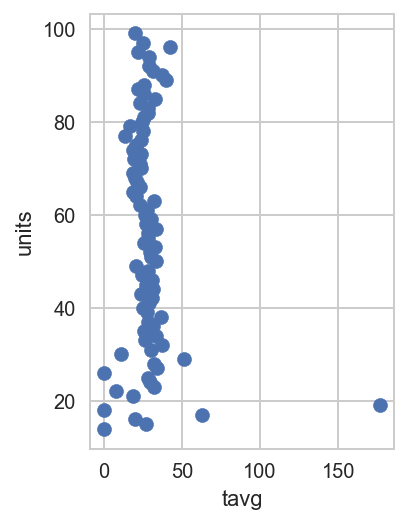

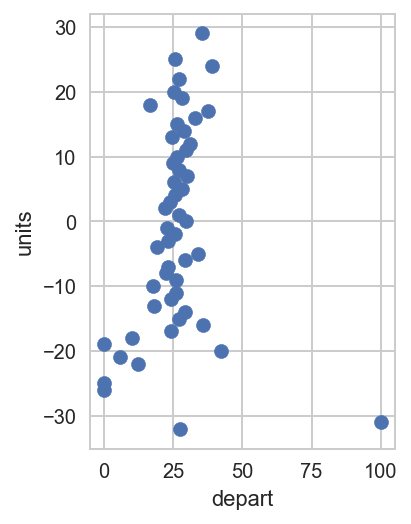

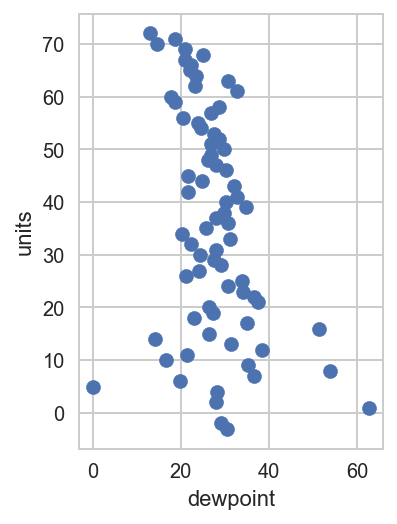

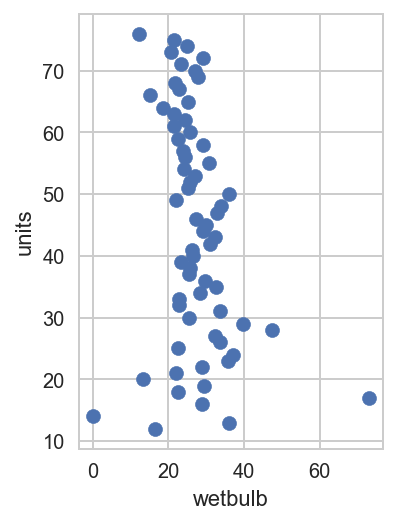

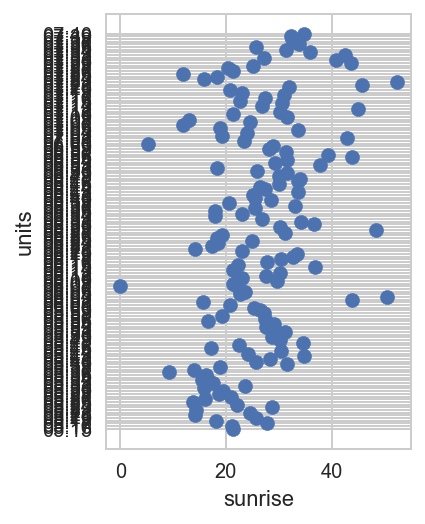

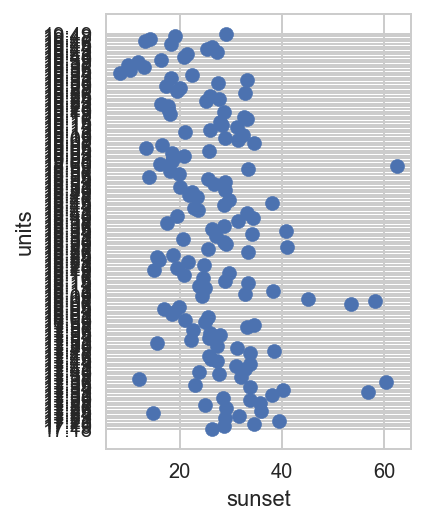

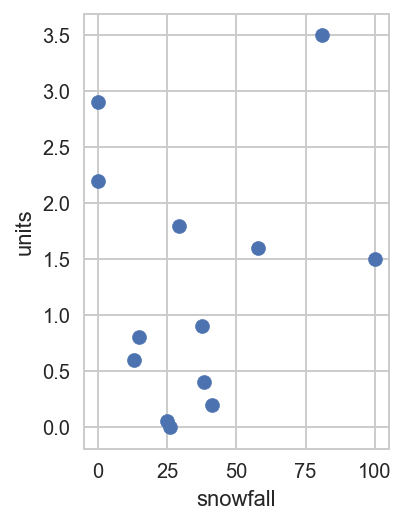

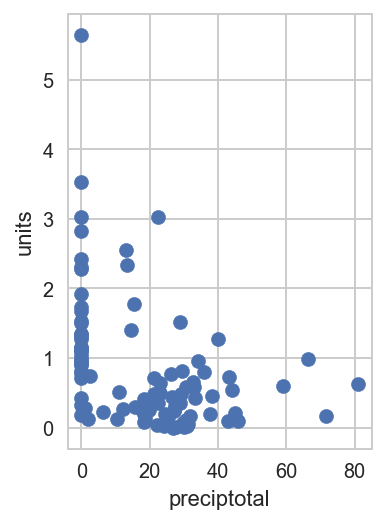

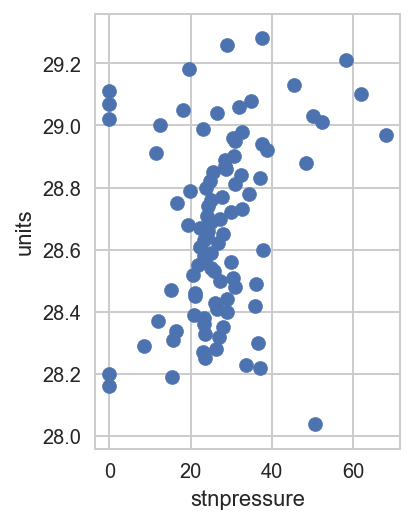

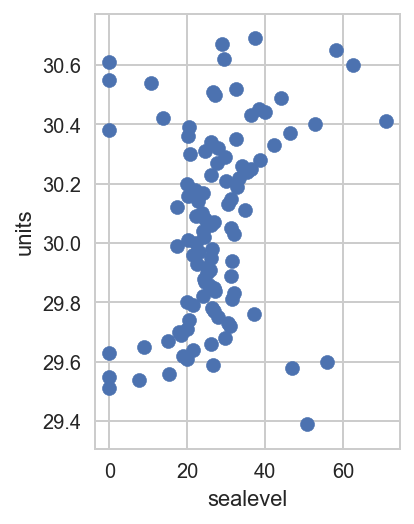

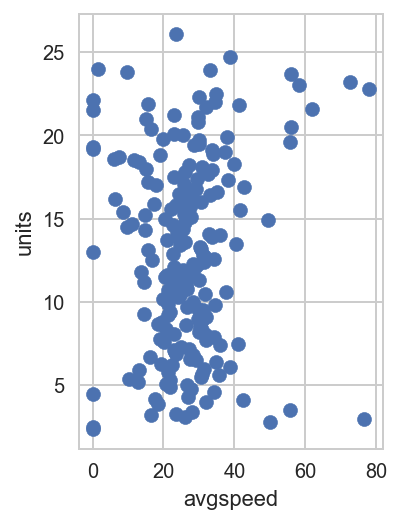

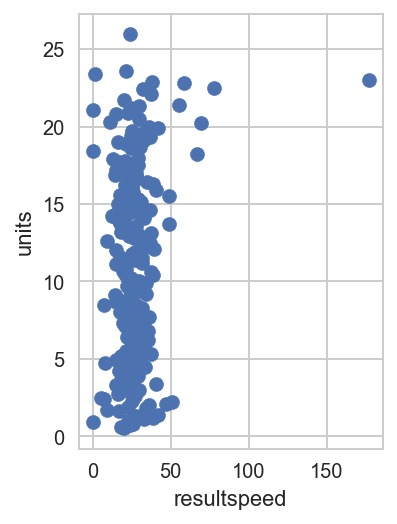

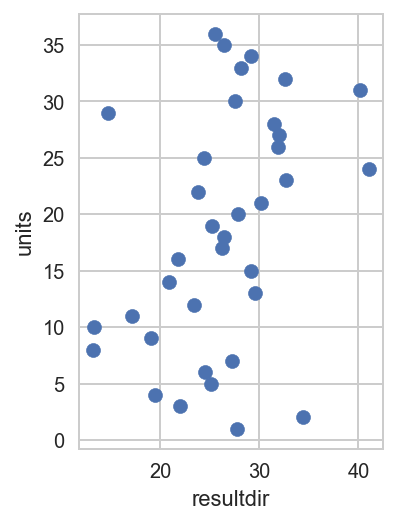

In [51]:
make_xyscatter(station_6, col_idx)

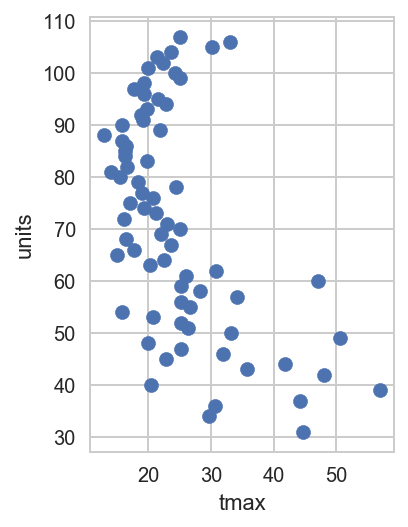

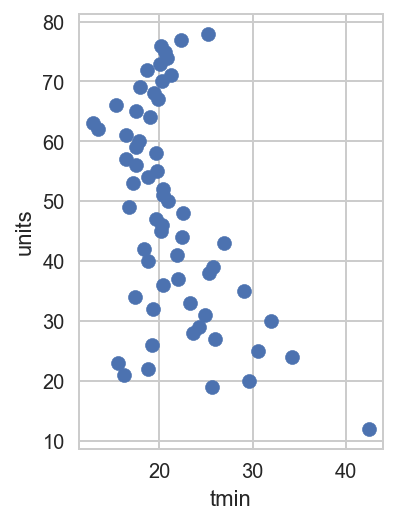

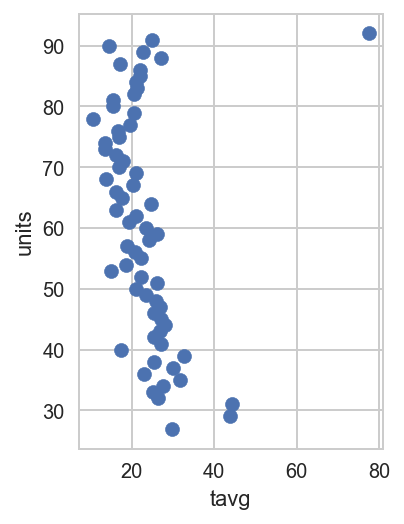

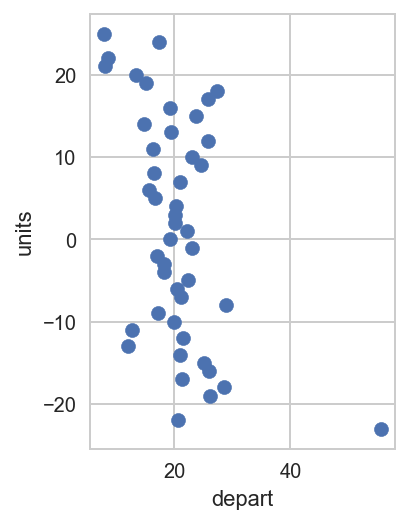

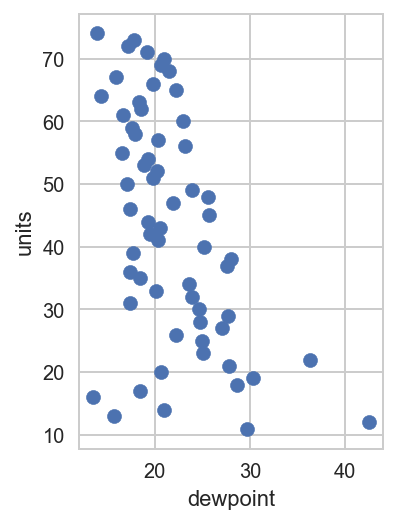

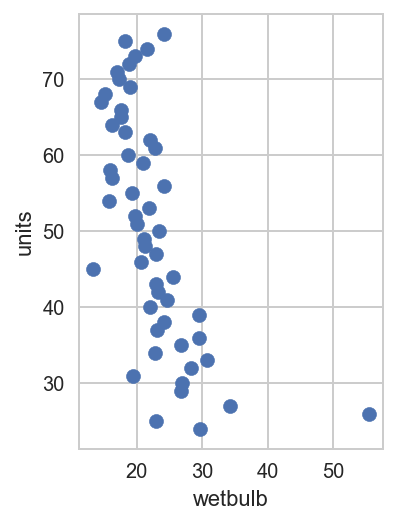

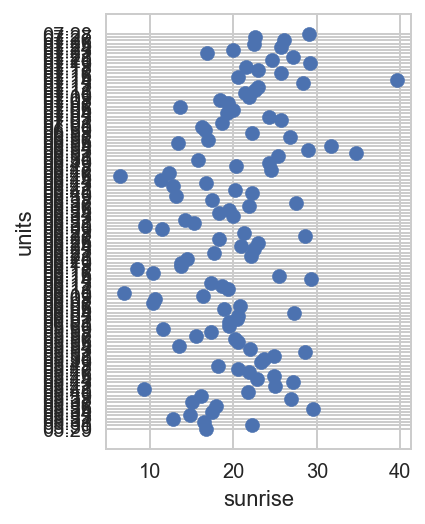

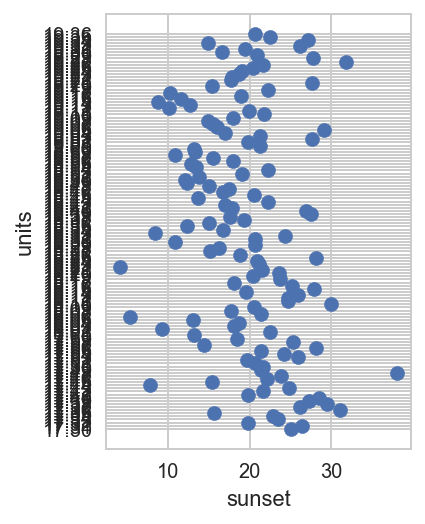

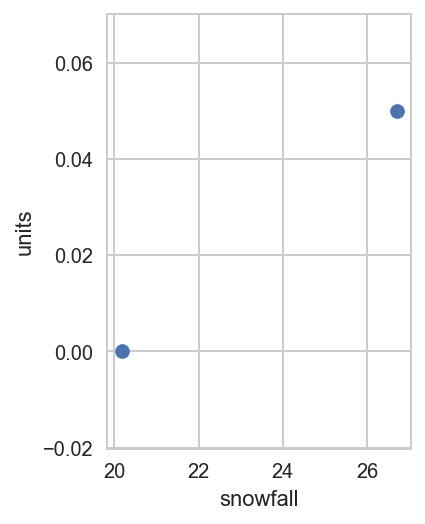

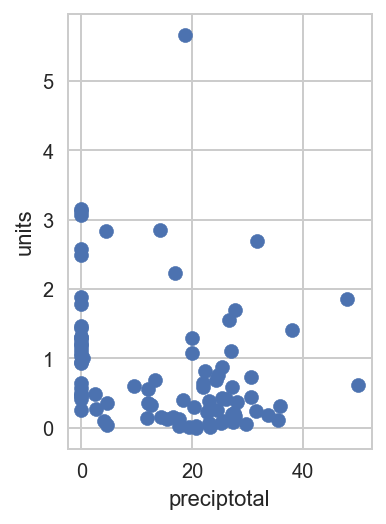

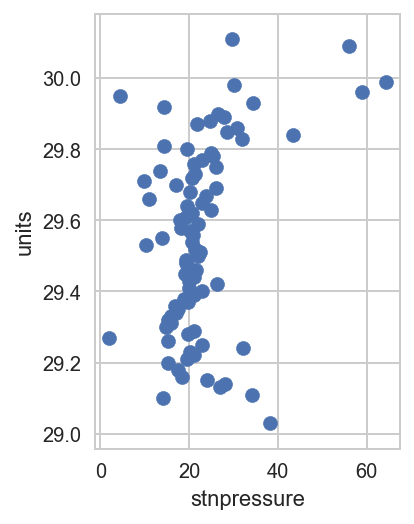

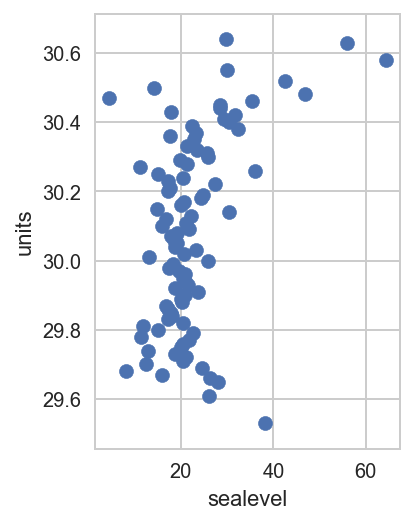

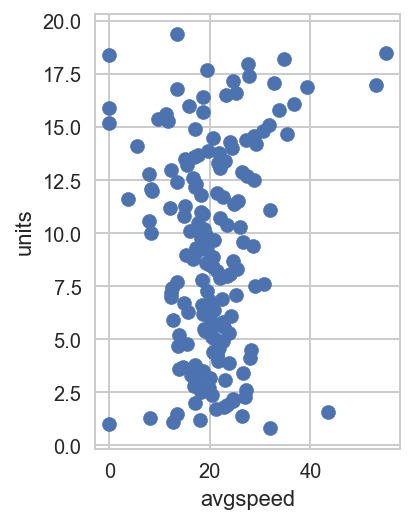

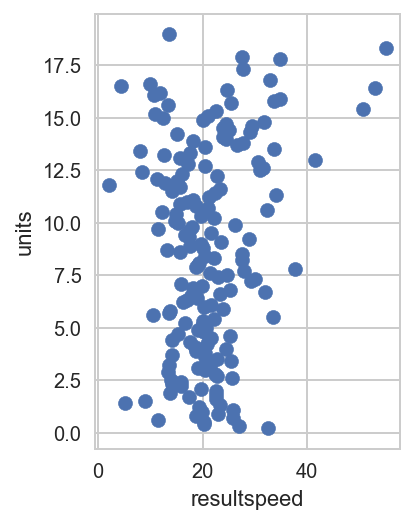

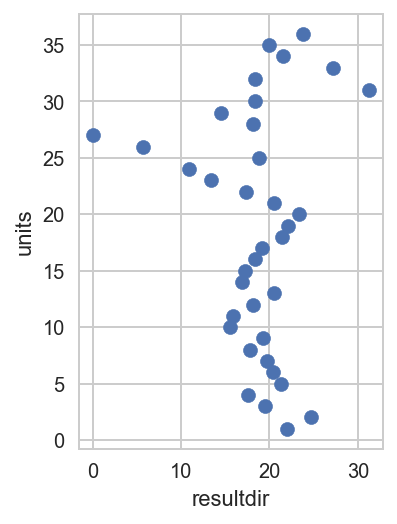

In [52]:
make_xyscatter(station_7, col_idx)

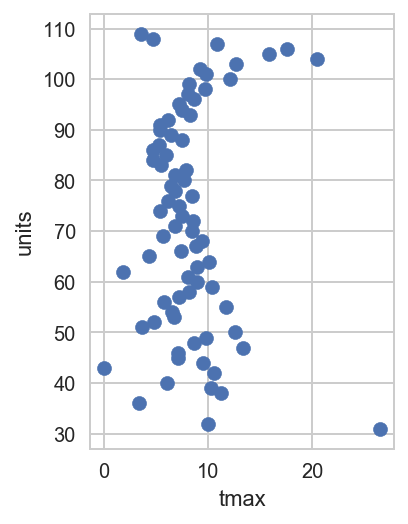

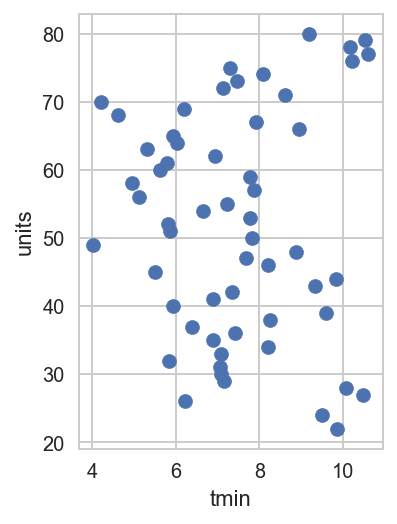

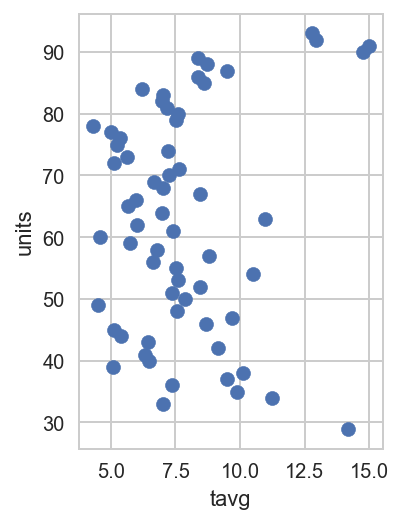

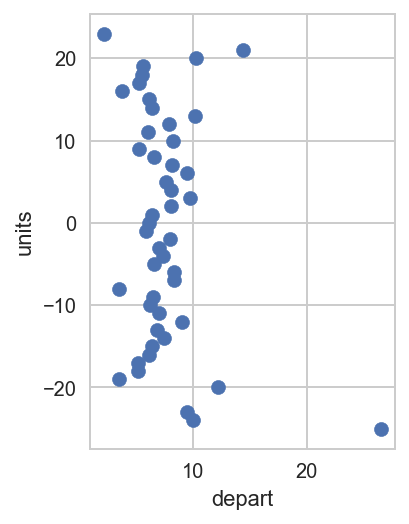

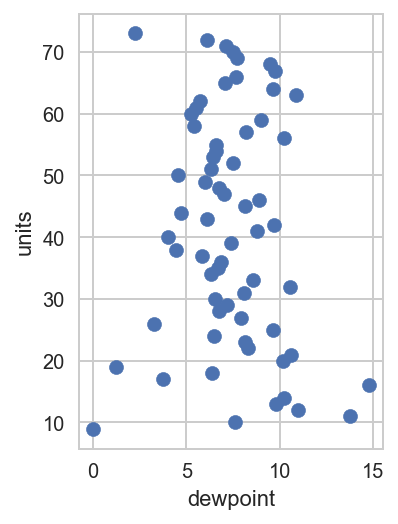

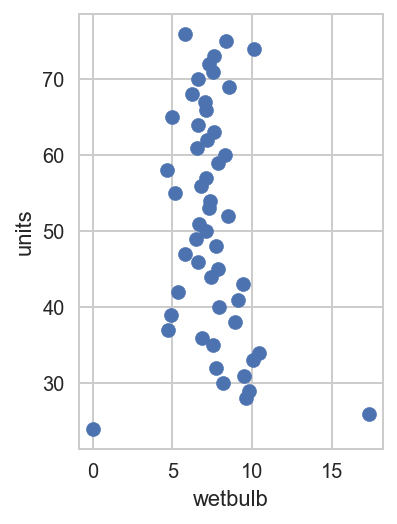

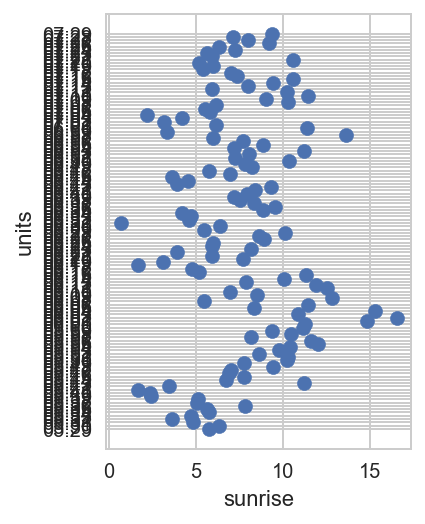

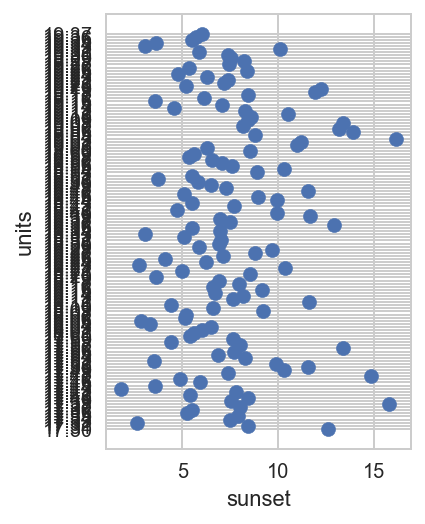

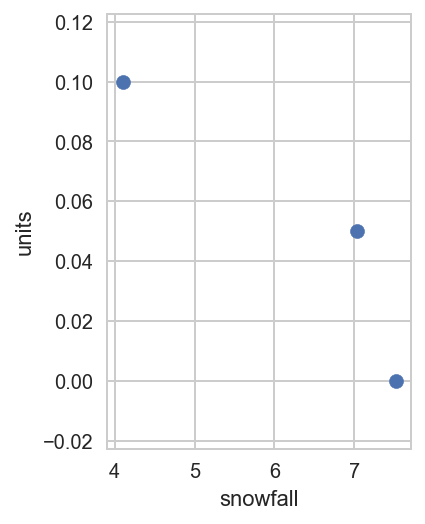

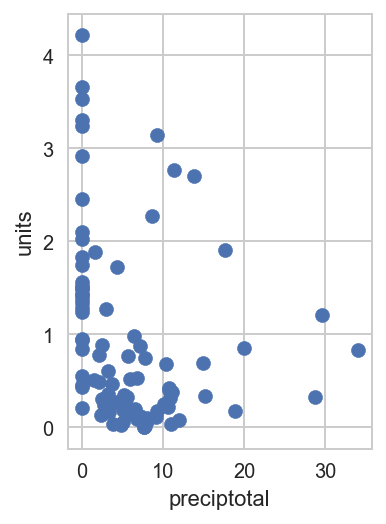

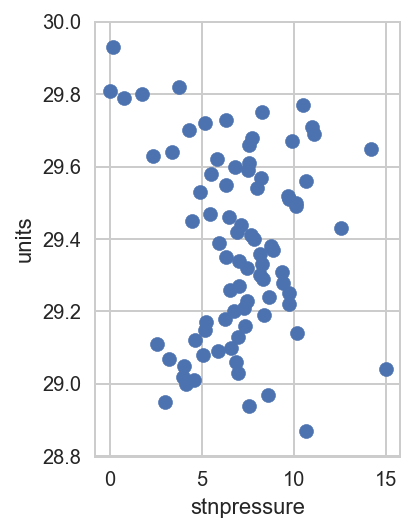

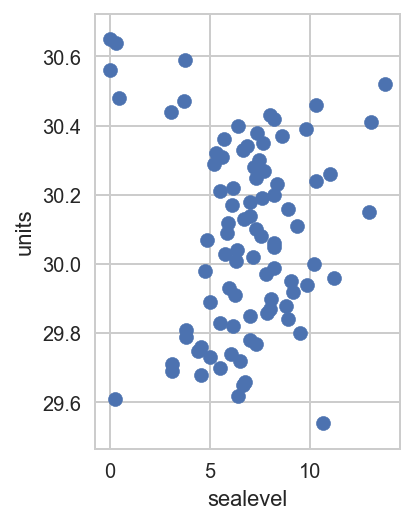

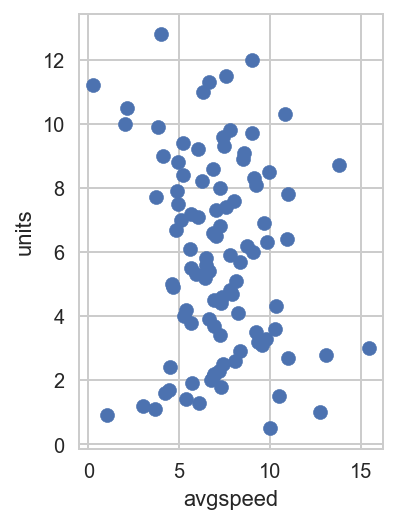

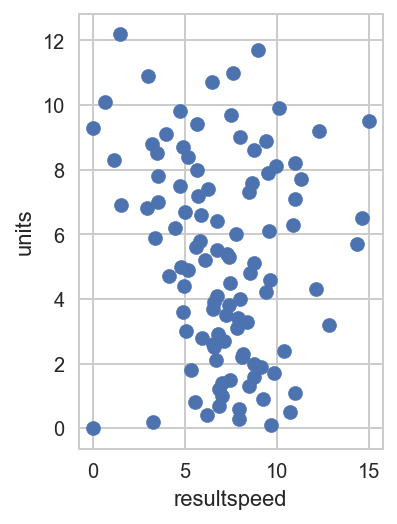

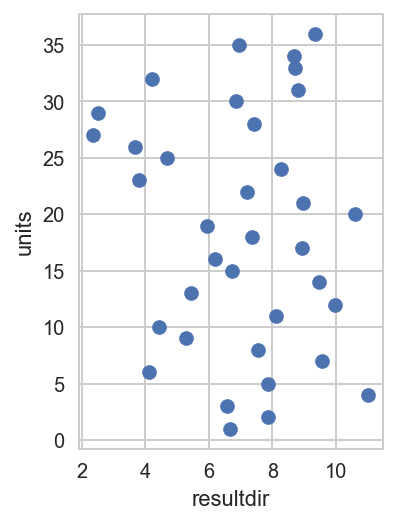

In [53]:
make_xyscatter(station_8, col_idx)

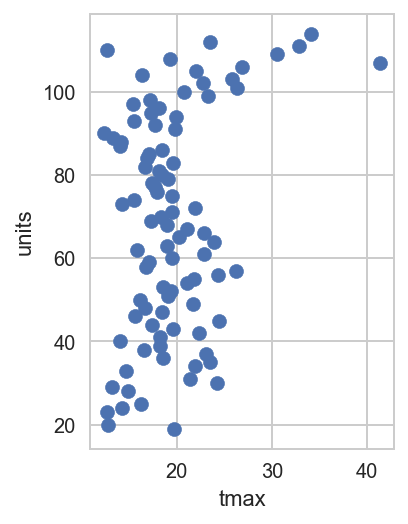

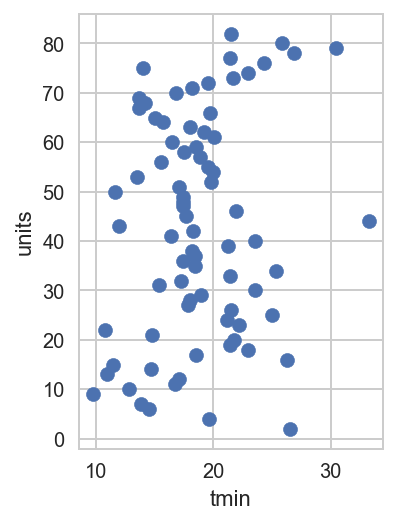

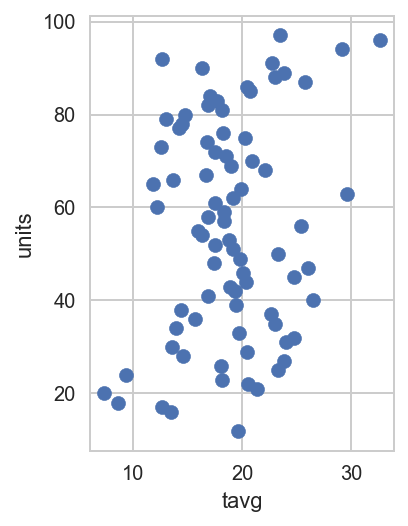

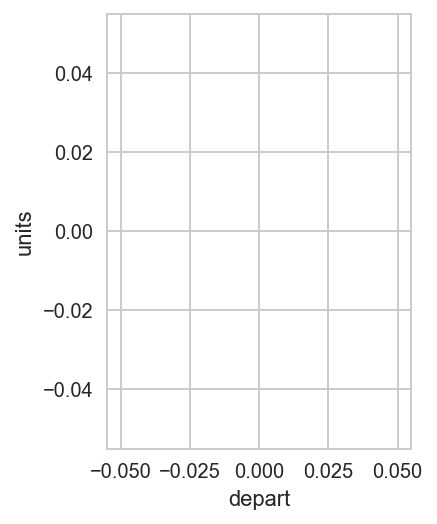

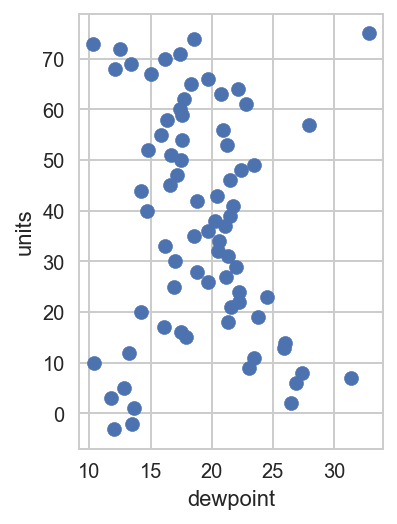

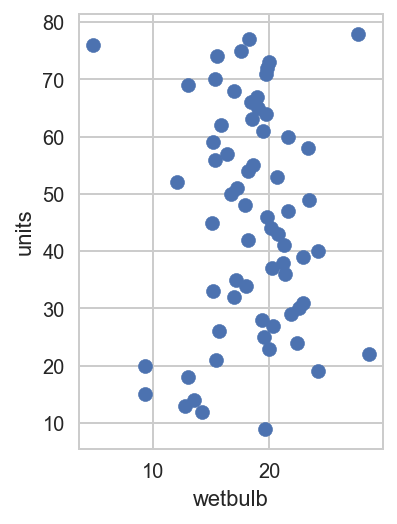

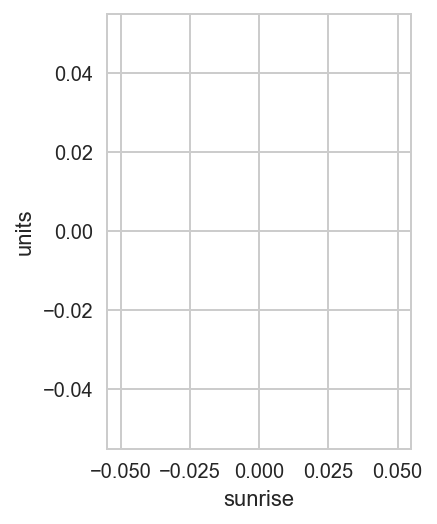

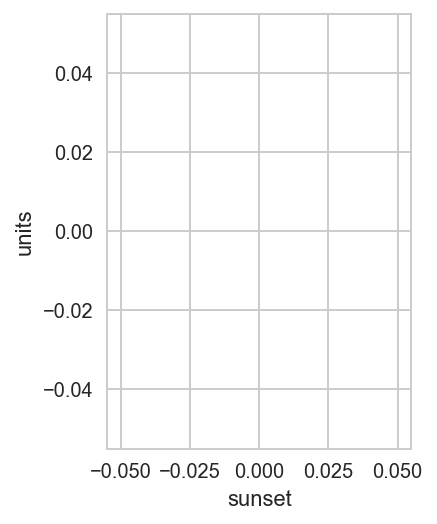

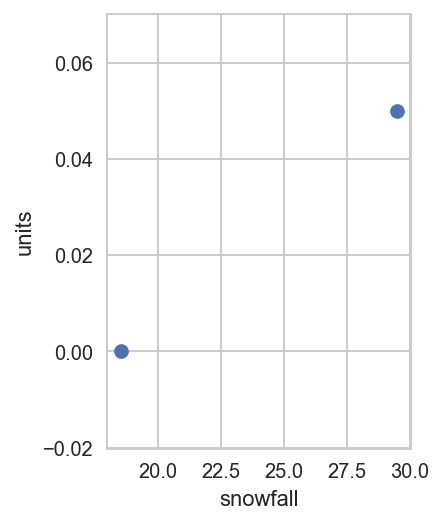

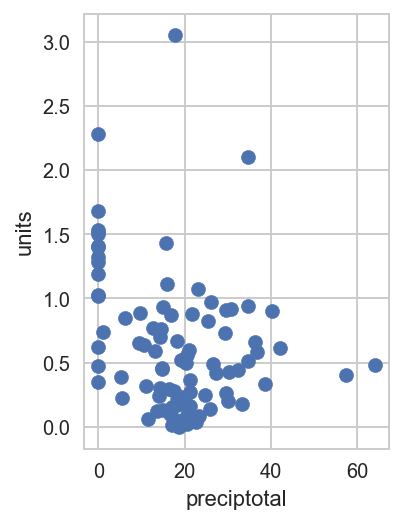

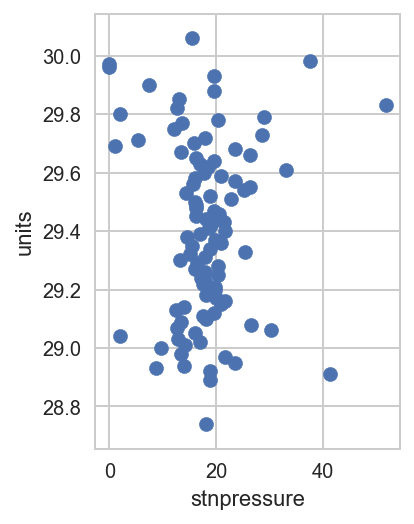

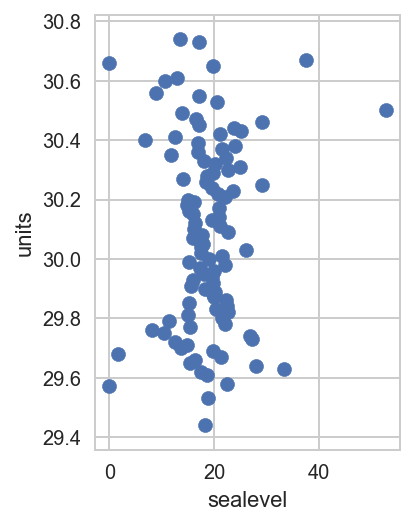

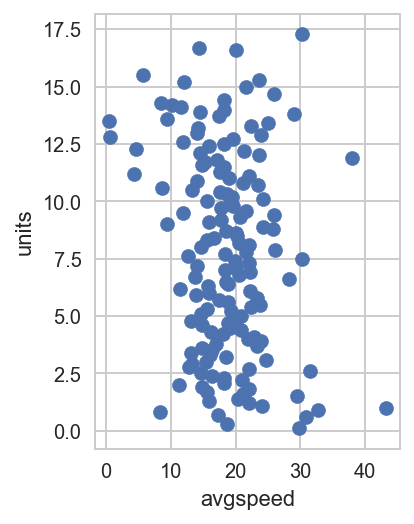

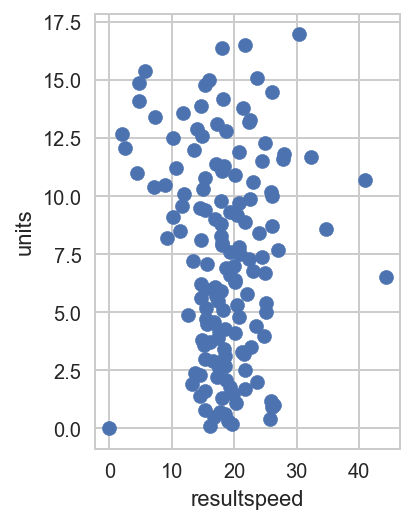

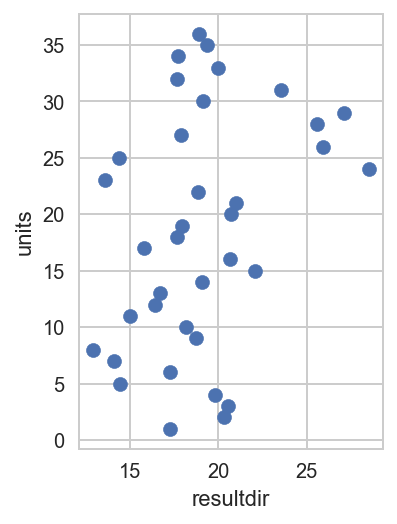

In [54]:
make_xyscatter(station_9, col_idx)

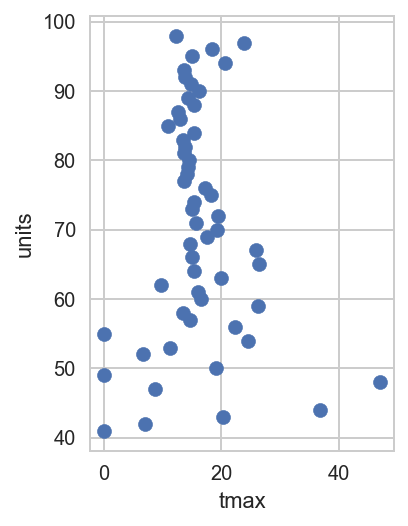

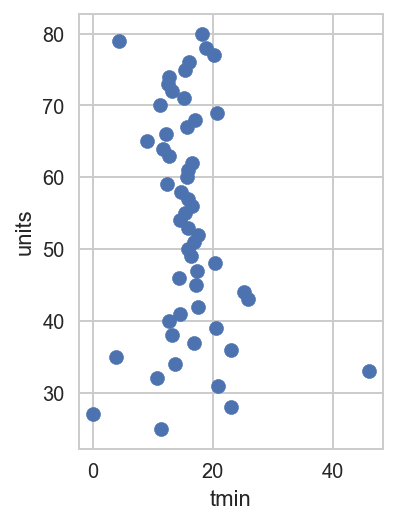

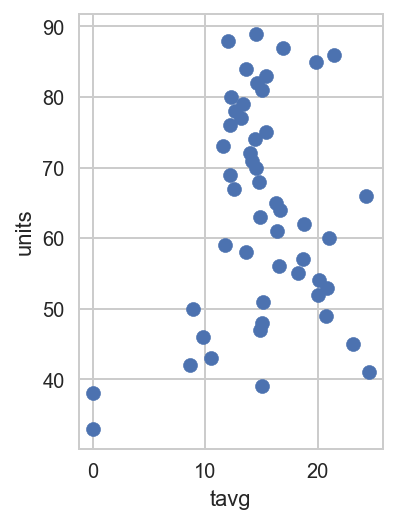

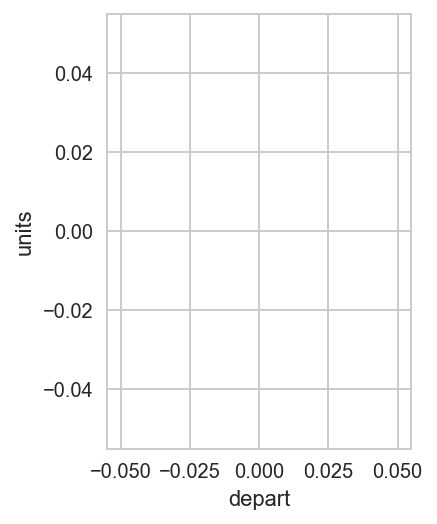

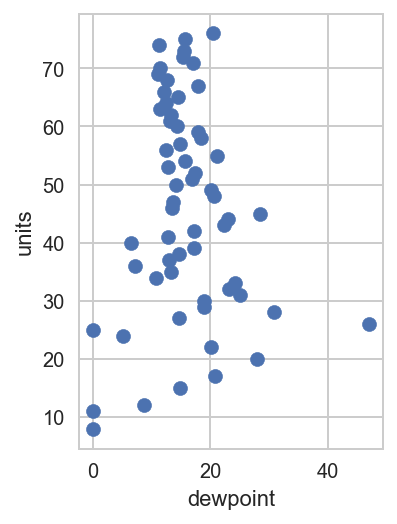

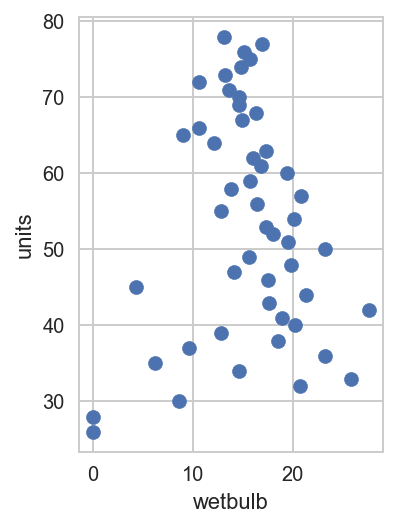

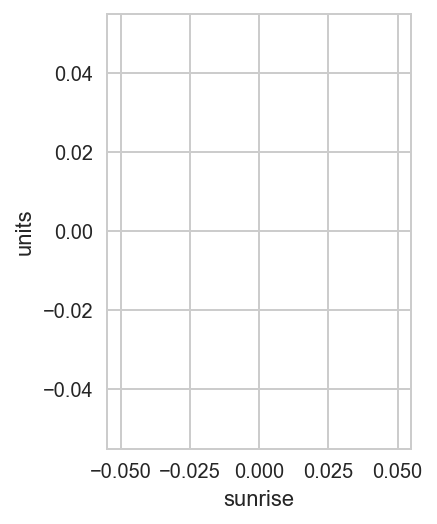

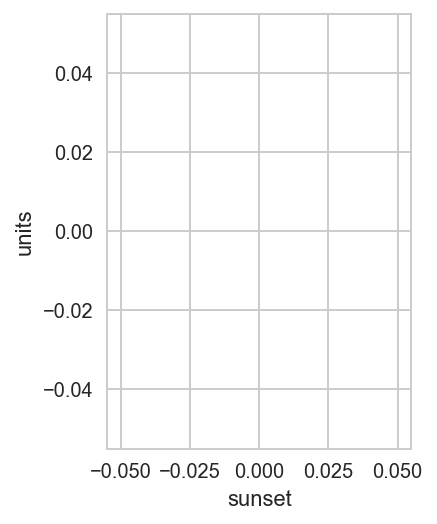

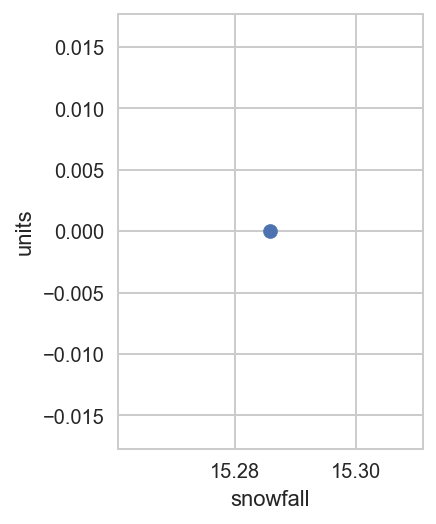

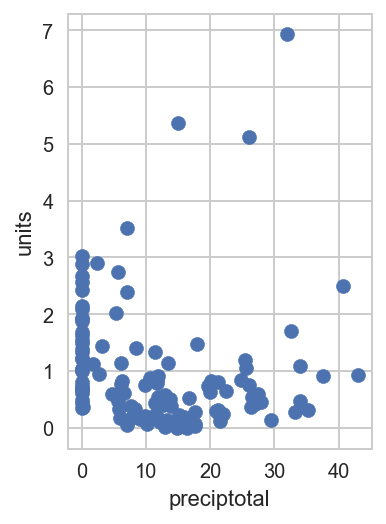

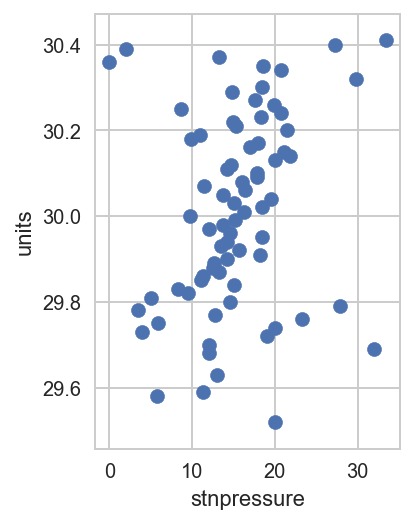

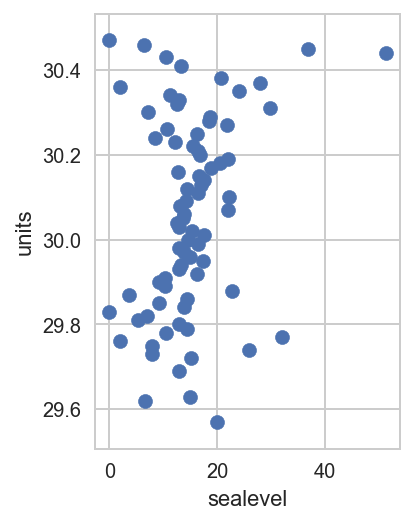

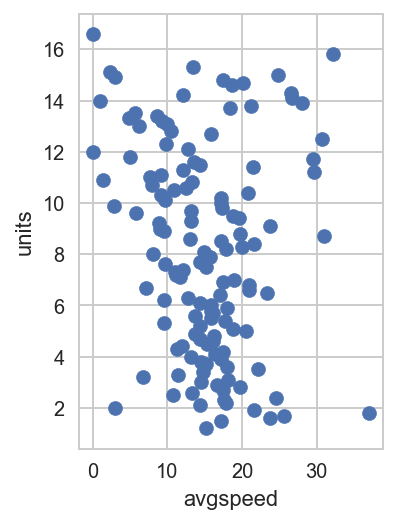

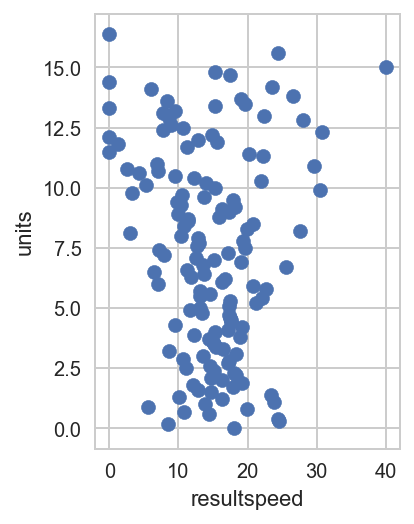

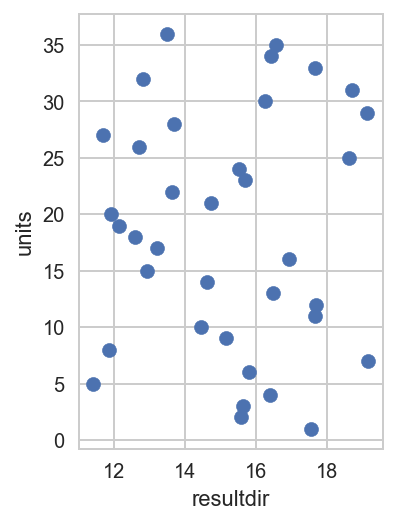

In [55]:
make_xyscatter(station_10, col_idx)

In [14]:

def HVXY_multi_boxplot(df, Vcol, Xcol, Ycol, cutover=10000, cutlower=-1, Hlist=[], Vlist=[], plotsize=6):
    """This function show boxplot_table============ 

    df : 플롯팅을 할 데이터프레임 이름
    
    H : (Binomial,Carcinality)한 열, Cardinality가 4 이내 추천
    └----Hlist = 리스트형태로 cardinality한 컬럼들을 쓴다.
            예) ["FG","RA","SN","TS","FG+","mon","tue","wed"]
         Hcol = deleted
    
    V : (Cardinality)한 index로 쓸수있는 열
    └---- Vcol = index처럼 쓰일 수 있는 column_name을 쓴다
            예) "item_nbr","store_nbr","station_nbr" 사용가능
          Vlist = 위의 값들 중 특정 값을 찾기위해 쓴다.
          
    X : X축은 Cardinality한 값을 넣는다. 
    └---- Xcol = X축으로 사용할 cardinality한 column_name을 쓴다
    
    Y : Y축은 실수형 값을 넣을 수 있다. units등 각종 실수형,정수형 숫자
    └---- Ycol = Y축으로 사용항 실수형,정수형 column_name을 쓴다
    
    cutover : 지정된 값을 초과하는 Y축 데이터는 빼고 플롯팅한다.
    cutlower : 지정된 값보다 작은 Y축 데이터는 빼고 플롯팅한다.
    
    plotsize : 플롯의 사이즈를 지정할 수 있음(정수형)
    
    """

    print("HVXY running...")
    #일단 입력되는 리스트의 크기를 판별한다.
    vsize=len(Vlist)
    hsize=len(Hlist)
    fig = plt.figure(figsize=(plotsize*hsize,plotsize*vsize))
    cnt=0
    for i in range(vsize):
        temp = df[(df[Vcol]==Vlist[i])&(df[Ycol]<cutover)&(df[Ycol]>cutlower)]
        subplot_num = [int(str(vsize)+str(hsize)+str(cnt+k)) for k in range(1,hsize+1)]
        
        print(subplot_num)
        for j in range(hsize):
#             ax = fig.add_subplot(subplot_num[j])
            ax = plt.subplot2grid((vsize+1,hsize+1), (i,j))
            if i == 0:
                sns.boxplot(ax=ax, x=Xcol, y=Ycol, hue=Hlist[j], data=temp).set_title(Hlist[j])
            else : 
                sns.boxplot(ax=ax, x=Xcol, y=Ycol, hue=Hlist[j], data=temp)
            if j == 0 : ax.set_ylabel(str(Vcol)+":"+str(Vlist[i]))
        cnt += hsize
        
    print("plotting screen...", end="")
    plt.show()
    print("Complete!")
    
    return "plot success"

HVXY running...
[541, 542, 543, 544]
[545, 546, 547, 548]
[549, 5410, 5411, 5412]
[5413, 5414, 5415, 5416]
[5417, 5418, 5419, 5420]
plotting screen...

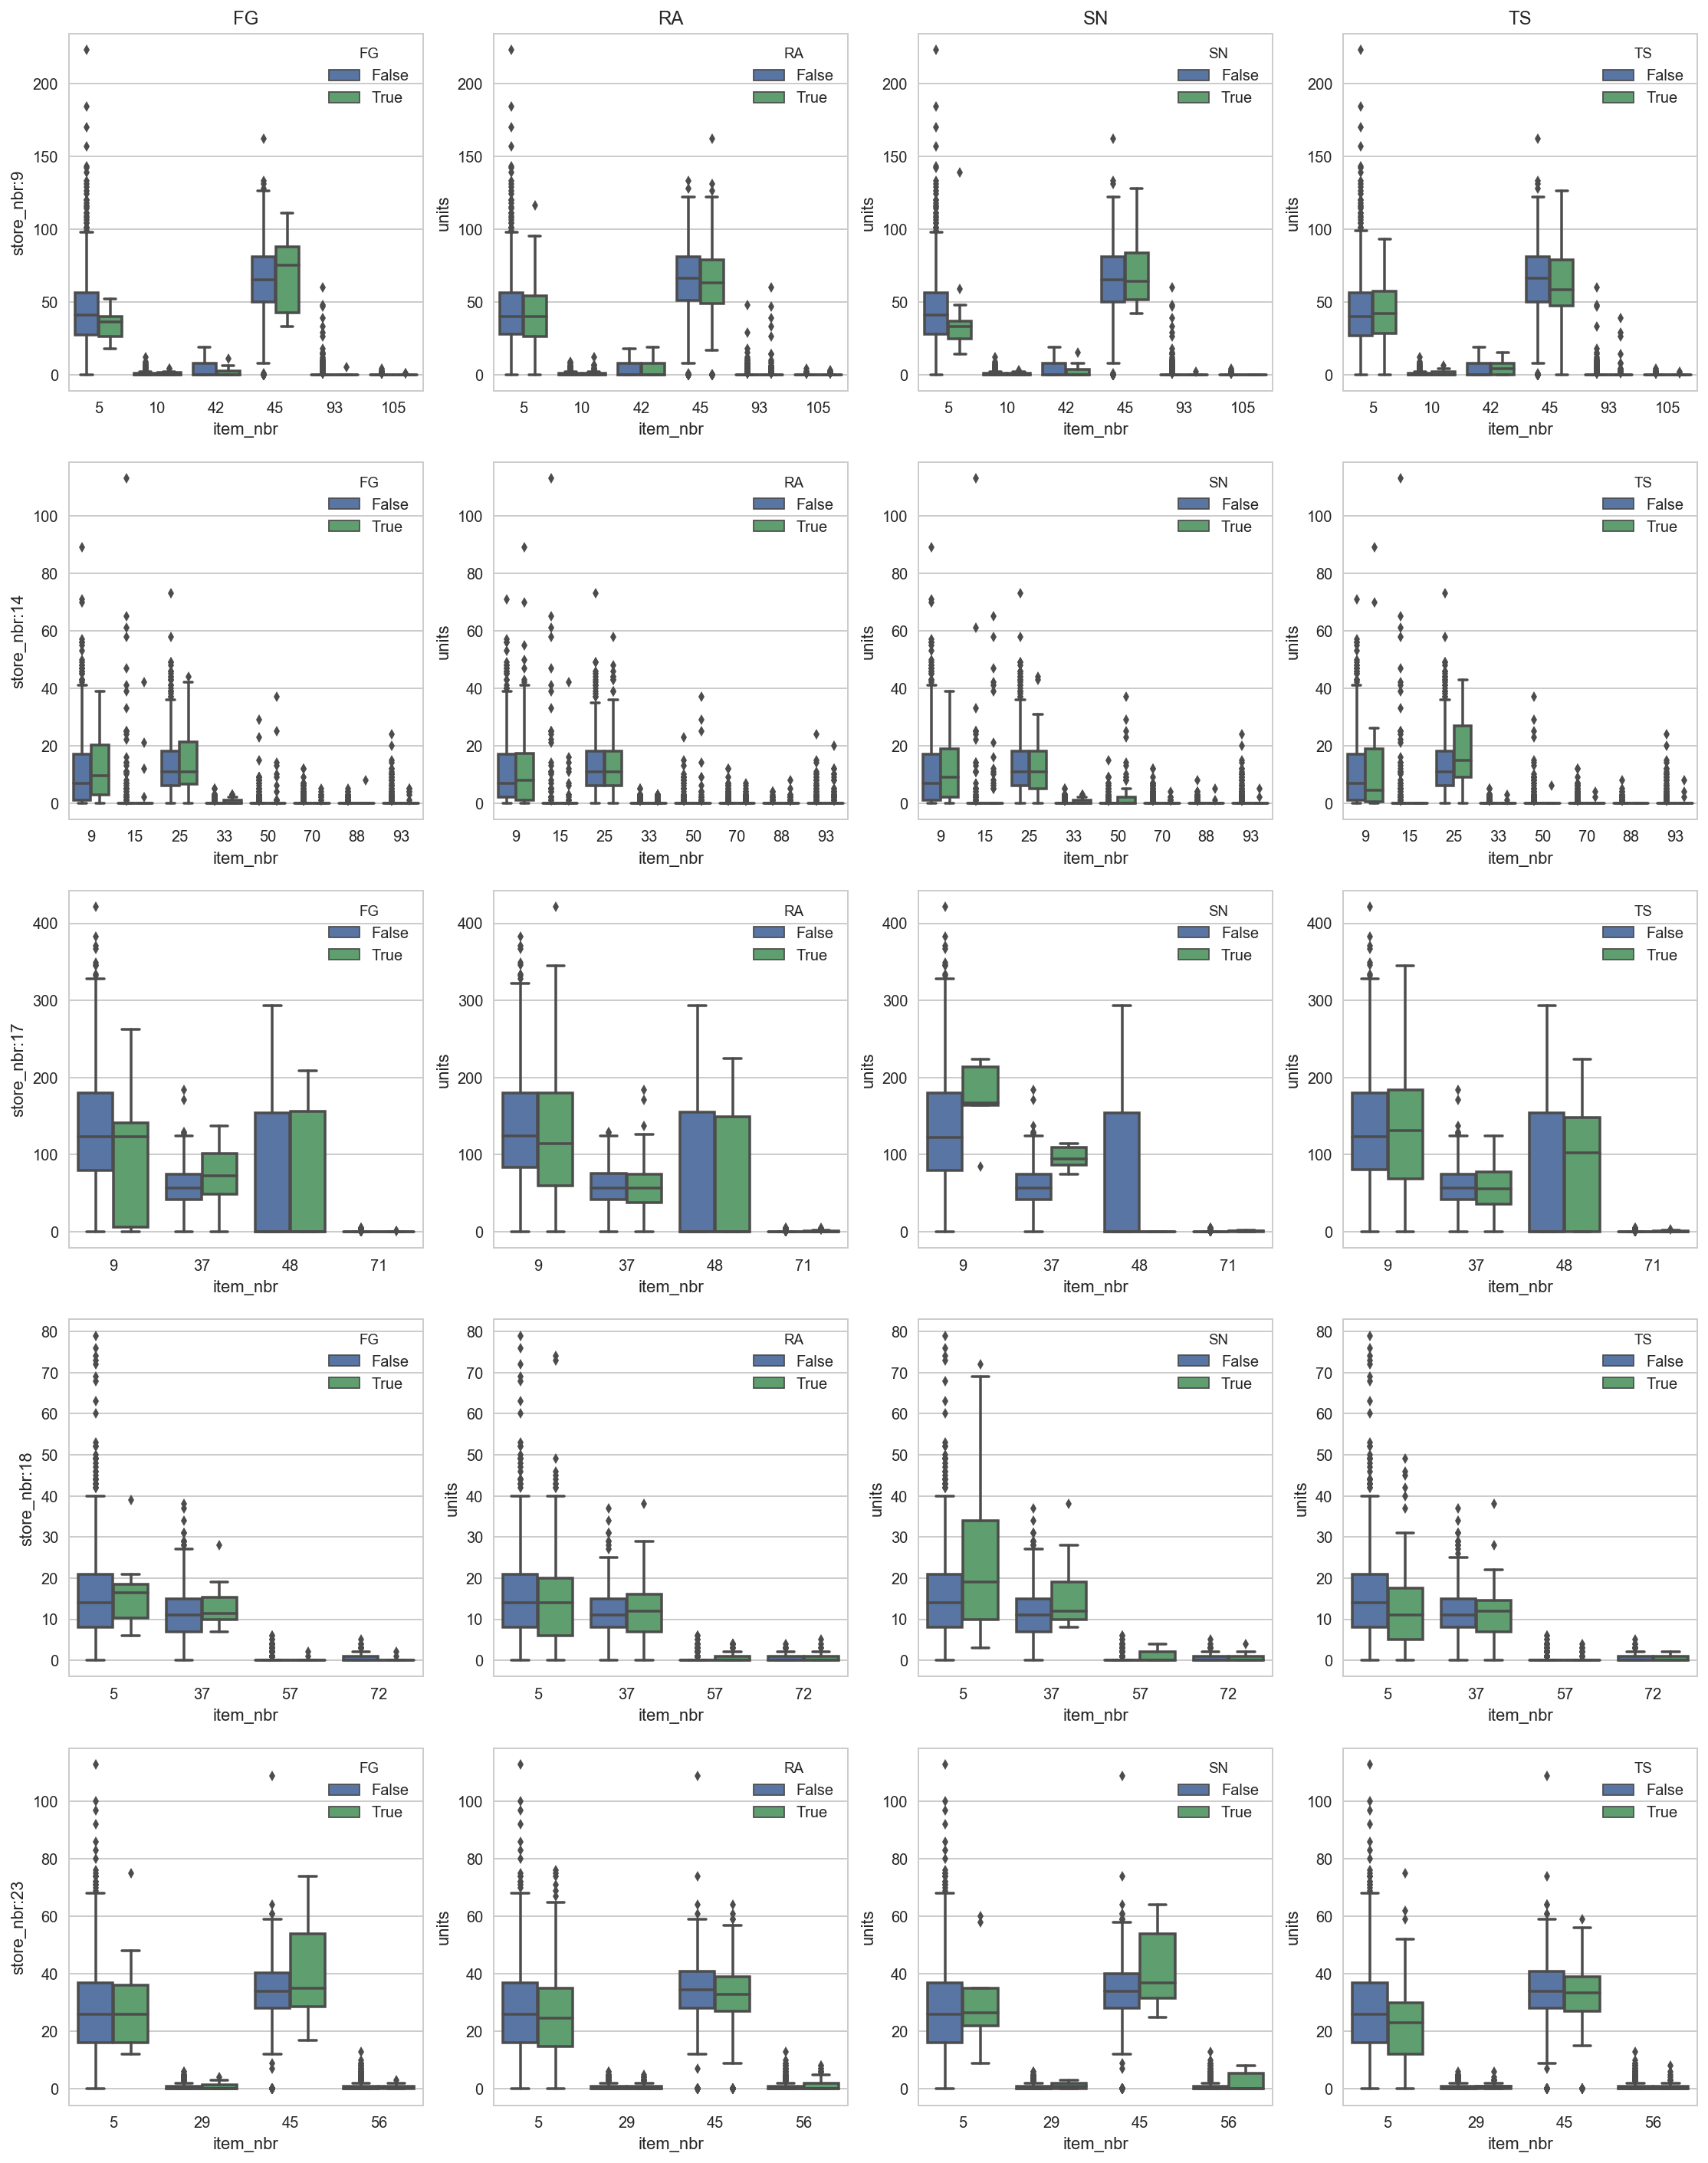

Complete!


'plot success'

In [15]:
HVXY_multi_boxplot(X_train2,Vcol="store_nbr",Xcol="item_nbr",Ycol="units",cutover=500, Hlist=["FG","RA","SN","TS"], Vlist=[9,14,17,18,23])

In [16]:
X_train2.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'week_day_name', 'day_of_year', 'year'],
      dtype='object')

In [ ]:
HVXY_multi_boxplot(X_train2,Vcol="store_nbr",Xcol="item_nbr",Ycol="units",cutover=500, Hlist=["TS","GR","RA","DZ"], Vlist=[9,14,17,18,23])